# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_api_key

'c51718a8fe1f408977826bbb65188383'

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
#containers for data
city_names = []
countries = []
latitudes = []
longitudes = []
temperatures = []
humidities = []
cloudy_skies = []
windiness = []

In [6]:
for city in cities:
    try:
        #get the data into json format
        response = requests.get(query_url + city).json()
        
        #store data into lists
        city_names.append(response['name'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        cloudy_skies.append(response["clouds"]["all"])
        windiness.append(response["wind"]["speed"])
        temperatures.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        countries.append(response['sys']['country'])
        print(f"{city}'s' information is processed")
        print("-" * 30)
    except:
        continue
        #cities not listed in the output were not found in the API
       

puerto ayora's' information is processed
------------------------------
busselton's' information is processed
------------------------------
rikitea's' information is processed
------------------------------
carnarvon's' information is processed
------------------------------
saint-philippe's' information is processed
------------------------------
bluff's' information is processed
------------------------------
soe's' information is processed
------------------------------
saskylakh's' information is processed
------------------------------
hobart's' information is processed
------------------------------
talnakh's' information is processed
------------------------------
atuona's' information is processed
------------------------------
guerrero negro's' information is processed
------------------------------
grand gaube's' information is processed
------------------------------
tuktoyaktuk's' information is processed
------------------------------
lavrentiya's' information is processe

dwarka's' information is processed
------------------------------
ligayan's' information is processed
------------------------------
bredasdorp's' information is processed
------------------------------
castro's' information is processed
------------------------------
codrington's' information is processed
------------------------------
sabang's' information is processed
------------------------------
mar del plata's' information is processed
------------------------------
mezen's' information is processed
------------------------------
tonder's' information is processed
------------------------------
montepuez's' information is processed
------------------------------
katsuura's' information is processed
------------------------------
arnedo's' information is processed
------------------------------
port augusta's' information is processed
------------------------------
vaini's' information is processed
------------------------------
peniche's' information is processed
---------------

bara's' information is processed
------------------------------
haines junction's' information is processed
------------------------------
pangnirtung's' information is processed
------------------------------
bridlington's' information is processed
------------------------------
jeremoabo's' information is processed
------------------------------
agadir's' information is processed
------------------------------
kampene's' information is processed
------------------------------
massaranduba's' information is processed
------------------------------
ilovlya's' information is processed
------------------------------
bandarbeyla's' information is processed
------------------------------
vila's' information is processed
------------------------------
vila franca do campo's' information is processed
------------------------------
okha's' information is processed
------------------------------
qarchi gak's' information is processed
------------------------------
hofn's' information is proces

jurado's' information is processed
------------------------------
samarai's' information is processed
------------------------------
kahului's' information is processed
------------------------------
altay's' information is processed
------------------------------
rota's' information is processed
------------------------------
almeria's' information is processed
------------------------------
avera's' information is processed
------------------------------
whitehorse's' information is processed
------------------------------
pascagoula's' information is processed
------------------------------
moratuwa's' information is processed
------------------------------
sao joao da barra's' information is processed
------------------------------
hambantota's' information is processed
------------------------------
celestun's' information is processed
------------------------------
beisfjord's' information is processed
------------------------------
kurumkan's' information is processed
----------

aquiraz's' information is processed
------------------------------
amazar's' information is processed
------------------------------
bakaly's' information is processed
------------------------------
la paz's' information is processed
------------------------------
namatanai's' information is processed
------------------------------
alta floresta's' information is processed
------------------------------
robertson's' information is processed
------------------------------
ostrovnoy's' information is processed
------------------------------
faanui's' information is processed
------------------------------
roald's' information is processed
------------------------------
upernavik's' information is processed
------------------------------
vila velha's' information is processed
------------------------------
beyneu's' information is processed
------------------------------
rocha's' information is processed
------------------------------
nichinan's' information is processed
-----------------

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame({
    "City": city_names,
    "Country": countries,
    "Latitude":latitudes,
    "Longitude": longitudes,
    "Temperatures": temperatures,
    "Humidity": humidities,
    "Cloudiness": cloudy_skies,
    "Windiness" : windiness
})
weather_df.head()

,City,Country,Latitude,Longitude,Temperatures,Humidity,Cloudiness,Windiness
0,Puerto Ayora,EC,-0.7393,-90.3518,77.00,95,100,1.01
1,Busselton,AU,-33.6500,115.3333,66.99,92,78,4.00
2,Rikitea,PF,-23.1203,-134.9692,77.68,66,12,7.67
3,Carnarvon,AU,-24.8667,113.6333,86.00,100,0,13.80
4,Saint-Philippe,RE,-21.3585,55.7679,89.60,55,0,11.50


In [8]:
weather_df.to_csv("./Data/weather_info.csv")

In [9]:
weather_df.count()

City            581
Country         581
Latitude        581
Longitude       581
Temperatures    581
Humidity        581
Cloudiness      581
Windiness       581
dtype: int64

In [10]:
weather_df.value_counts()

City         Country  Latitude  Longitude  Temperatures  Humidity  Cloudiness  Windiness
Ürümqi       CN        43.8010   87.6005   21.20         79        100         4.47         1
Iskitim      RU        54.6366   83.3045   24.80         93        90          15.66        1
Hualmay      PE       -11.0964  -77.6139   70.86         76        100         6.17         1
Hong Kong    HK        22.2855   114.1577  73.00         75        60          1.01         1
Hofn         IS        64.2539  -15.2082   36.59         80        100         13.38        1
                                                                                           ..
Pangnirtung  CA        66.1451  -65.7125   18.99         76        0           4.94         1
Palmer       US        42.1584  -72.3287   18.00         57        1           9.22         1
Pahrump      US        36.2083  -115.9839  42.80         36        1           3.44         1
Padang       ID       -0.9492    100.3543  89.60         58      

Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
weather_df[weather_df["Humidity"] > 100]

,City,Country,Latitude,Longitude,Temperatures,Humidity,Cloudiness,Windiness


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"There are no cities with humidities > 100%")

There are no cities with humidities > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

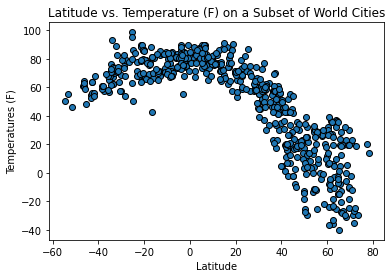

In [21]:
plt.scatter(weather_df.Latitude, weather_df.Temperatures, edgecolors="black")
plt.title("Latitude vs. Temperature (F) on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Temperatures (F)")
plt.savefig("./Images/lat_temp.png")
plt.show()
plt.close()

In [24]:
##Latitude vs Temperature plot
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Temperatures)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. temperature plot is a curvlinear (inverted U) relationship with a r^2 value of {r_squared}, which exhibits a moderate correlation")

The latitude vs. temperature plot is a curvlinear (inverted U) relationship with a r^2 value of 0.59, which exhibits a moderate correlation


## Latitude vs. Humidity Plot

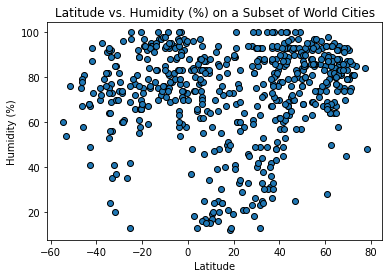

In [30]:
plt.scatter(weather_df.Latitude, weather_df.Humidity, edgecolors="black")
plt.title("Latitude vs. Humidity (%) on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("./Images/lat_humid.png")
plt.show()
plt.close()

In [63]:
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Humidity)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. humidity plot has no correlation. It has a r_squared value of {r_squared}.")

The latitude vs. humidity plot has no correlation. It has a r_squared value of 0.03.


## Latitude vs. Cloudiness Plot

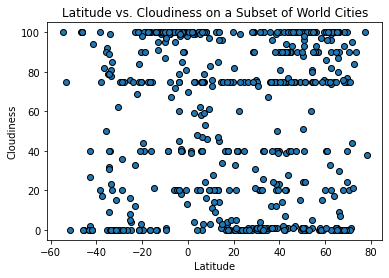

In [29]:
plt.scatter(weather_df.Latitude, weather_df.Cloudiness, edgecolors="black")
plt.title("Latitude vs. Cloudiness on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("./Images/lat_cloudiness.png")
plt.show()
plt.close()

In [28]:
correlation_matrix = np.corrcoef(weather_df.Latitude, weather_df.Cloudiness)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared = round(r_squared,2)
print(f"The latitude vs. cloudiness plot has no correlation. It has a r_squared value of {r_squared}.")

The latitude vs. cloudiness plot has no correlation. It has a r_squared value of 0.0.


## Latitude vs. Wind Speed Plot

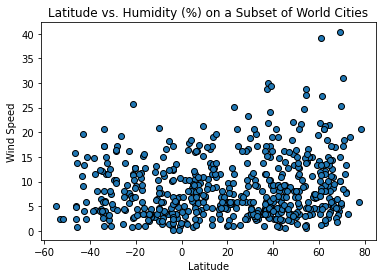

In [31]:
plt.scatter(weather_df.Latitude, weather_df.Windiness, edgecolors="black")
plt.title("Latitude vs. Humidity (%) on a Subset of World Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("./Images/lat_winds.png")
plt.show()
plt.close()

In [32]:
print(f"The cluster of data points are scattered towards the bottom of the scatter plot. Windiness seems to be constant throughout the latitudes")

The cluster of data points are scattered towards the bottom of the scatter plot. Windiness seems to be constant throughout the latitudes


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression